In [3]:
print('----Question 1.1& 1.2----')
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import datetime as dt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

def getDataBatch(tickers, startdate, enddate):
    def getData(ticker):
        return pdr.get_data_yahoo(ticker, start = startdate, end = enddate)
    dates = map(getData, tickers)
    return pd.concat(dates, keys = tickers, names = ['Ticker', 'Date'])

startdate  = dt.datetime(2008, 12, 31)
enddate = dt.datetime(2018, 12, 31)

tickers = ['AAPL', 'AMZN', 'GS', '^GSPC']
stock_data = getDataBatch(tickers, startdate, enddate)

daily_close_px = stock_data.reset_index().pivot(index = 'Date', columns = 'Ticker', values = 'Adj Close')
names = daily_close_px.columns.tolist()
names[names.index('^GSPC')] = 'SP500'
daily_close_px.columns = names

daily_close_px.to_excel('Output.xlsx', sheet_name = 'PriceData')

----Question 1.1& 1.2----
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


In [4]:
print('----Question 1.3----')
daily_pct_change = daily_close_px.pct_change().dropna()
daily_pct_change['Portfolio Performance'] = (daily_pct_change['AAPL'] + daily_pct_change['AMZN'] + daily_pct_change['GS'])/3
daily_pct_change.tail(10)

----Question 1.3----


,AAPL,AMZN,GS,SP500,Portfolio Performance
Date,,,,,
2018-12-17,-0.009295,-0.044601,-0.027551,-0.020773,-0.027149
2018-12-18,0.012963,0.020100,0.020780,0.000086,0.017948
2018-12-19,-0.031200,-0.036352,-0.013078,-0.015396,-0.026877
2018-12-20,-0.025223,-0.022908,-0.004977,-0.015772,-0.017703
2018-12-21,-0.038911,-0.057077,-0.049657,-0.020588,-0.048548
2018-12-24,-0.025849,-0.024313,-0.023082,-0.027112,-0.024415
2018-12-26,0.070439,0.094452,0.042062,0.049594,0.068984
2018-12-27,-0.006503,-0.006295,0.015199,0.008563,0.000800
2018-12-28,0.000518,0.011207,-0.014358,-0.001242,-0.000878


In [6]:
print('----Question 1.4----')
columns = ['AAPL', 'AMZN', 'GS', 'SP500','Portfolio Performance']
import numpy as np
def annualized_mean_return(ticker, trading_days):
    daily_mean = np.mean(daily_pct_change[ticker])
    return (1+daily_mean)**trading_days - 1

def annualized_stdev(ticker, trading_days):
    daily_stdev = np.std(daily_pct_change[ticker], ddof = 1)
    return daily_stdev * np.sqrt(trading_days)

for column in columns:
    print('Apple Annualized Return: ', annualized_mean_return(column, 252))
    print('Apple Annualized Volatility: ', annualized_stdev(column, 252))


----Question 1.4----
Apple Annualized Return:  0.35573206999395857
Apple Annualized Volatility:  0.2666323852792536
Apple Annualized Return:  0.48641168048779826
Apple Annualized Volatility:  0.3440693398640665
Apple Annualized Return:  0.14001657839272208
Apple Annualized Volatility:  0.31512789286927934
Apple Annualized Return:  0.12310318875516546
Apple Annualized Volatility:  0.16641342253233601
Apple Annualized Return:  0.31952758685311666
Apple Annualized Volatility:  0.23759742427593752


----Question 1.5----


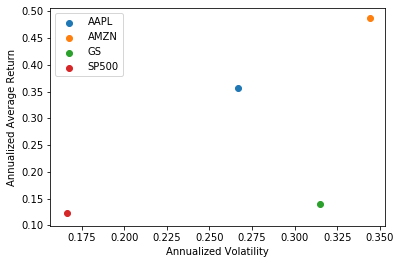

In [9]:
print('----Question 1.5----')
import matplotlib.pyplot as plt

for i in daily_close_px.columns.tolist():
    plt.scatter(annualized_stdev(i, 252), annualized_mean_return(i, 252), label = i)

plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Average Return')
plt.legend()
plt.show()

In [10]:
print('----Question 1.6.method1----')
def fetch_rolling(ticker, trading_days):
    rolling_return_list = []
    return_list = list(daily_pct_change[ticker])
    return_list.reverse()
    for i in range(len(return_list)- trading_days):
        rolling_return = np.mean(return_list[i:i+trading_days-1])
        rolling_return_list.append(round(rolling_return, 6))
    return rolling_return_list

for i in daily_pct_change.columns.tolist():
    print(f'The rolling annual return for {i}:', fetch_rolling(i, 252))
    print('\n')
        

----Question 1.6.method1----
The rolling annual return for AAPL: [-5.7e-05, -0.000139, -0.00013, -0.000103, -0.000485, -0.000382, -0.000212, -0.000115, -3.4e-05, -2.9e-05, 4.8e-05, 0.000175, 0.000144, 0.000111, 0.000211, 0.000186, 0.000335, 0.000365, 0.000537, 0.000368, 0.000371, 0.000458, 0.000222, 0.000207, 0.000133, 0.000235, 0.000281, 0.000545, 0.000699, 0.000633, 0.000582, 0.000642, 0.000622, 0.000807, 0.00087, 0.000876, 0.000788, 0.000758, 0.000911, 0.001279, 0.001247, 0.001093, 0.001128, 0.001293, 0.001499, 0.001437, 0.001556, 0.001543, 0.001516, 0.001462, 0.001461, 0.001461, 0.001388, 0.001546, 0.001429, 0.00145, 0.001652, 0.001598, 0.001621, 0.001683, 0.001803, 0.001729, 0.001711, 0.001676, 0.001684, 0.001577, 0.001637, 0.001681, 0.001588, 0.001592, 0.001493, 0.001424, 0.001419, 0.001495, 0.001581, 0.00145, 0.00147, 0.001353, 0.001479, 0.001446, 0.001496, 0.001518, 0.001457, 0.001412, 0.001392, 0.001343, 0.001346, 0.001354, 0.001356, 0.00133, 0.001335, 0.001408, 0.00144, 0.001

The rolling annual return for GS: [-0.001494, -0.00162, -0.001554, -0.001642, -0.001829, -0.001768, -0.001479, -0.001479, -0.001481, -0.00152, -0.001384, -0.001314, -0.001329, -0.001206, -0.001165, -0.001117, -0.00098, -0.001013, -0.000898, -0.00089, -0.000784, -0.000626, -0.000677, -0.00059, -0.000715, -0.000651, -0.000704, -0.000567, -0.000489, -0.000479, -0.000474, -0.000418, -0.000449, -0.00015, -6e-06, -2e-05, -5e-05, -0.000101, -9.9e-05, -0.000187, -0.000172, -0.000254, -0.000316, -0.00037, -0.000339, -0.000431, -0.000311, -0.000212, -0.00016, -0.000117, -9.3e-05, -0.00011, -0.000334, -0.000295, -0.000333, -0.00034, -0.0002, -0.00016, -0.000206, -0.000175, -7.5e-05, -0.000126, -0.000123, -8.5e-05, 6e-06, 3.7e-05, 0.000183, 0.000184, 0.000212, 0.000242, 0.000238, 0.000137, 0.000143, 0.000208, 0.000163, 0.000165, 0.000212, 0.000329, 0.000434, 0.000469, 0.000466, 0.000487, 0.000346, 0.000411, 0.000467, 0.000515, 0.000525, 0.00036, 0.000372, 0.000426, 0.0004, 0.000402, 0.000336, 0.00

In [11]:
print('----Question 1.6.method2----')
for i in daily_pct_change.columns.tolist():
    rolling_return = daily_pct_change[i].rolling(252).mean()
    print('The rolling annual return for %s: '%i, rolling_return)

----Question 1.6.method2----
The rolling annual return for AAPL:  Date
2009-01-02         NaN
2009-01-05         NaN
2009-01-06         NaN
2009-01-07         NaN
2009-01-08         NaN
                ...   
2018-12-24   -0.000483
2018-12-26   -0.000203
2018-12-27   -0.000129
2018-12-28   -0.000127
2018-12-31   -0.000100
Name: AAPL, Length: 2516, dtype: float64
The rolling annual return for AMZN:  Date
2009-01-02         NaN
2009-01-05         NaN
2009-01-06         NaN
2009-01-07         NaN
2009-01-08         NaN
                ...   
2018-12-24    0.000775
2018-12-26    0.001171
2018-12-27    0.001118
2018-12-28    0.001144
2018-12-31    0.001195
Name: AMZN, Length: 2516, dtype: float64
The rolling annual return for GS:  Date
2009-01-02         NaN
2009-01-05         NaN
2009-01-06         NaN
2009-01-07         NaN
2009-01-08         NaN
                ...   
2018-12-24   -0.001853
2018-12-26   -0.001654
2018-12-27   -0.001575
2018-12-28   -0.001605
2018-12-31   -0.001515
Name: 

In [56]:
print('----Question 1.6.3----')
print('They are different!')

----Question 1.6.3----
They are different!


In [78]:
mask_positive = daily_pct_change['SP500'] > 0
mask_negative = daily_pct_change['SP500'] < 0


When SP500 is positive, the annual mean for AAPL is  5.04048726644004
When SP500 is positive, the annual stdev for AAPL is  0.2437650866816162
When SP500 is positive, the annual mean for AMZN is  8.515194681392707
When SP500 is positive, the annual stdev for AMZN is  0.3088581283401202
When SP500 is positive, the annual mean for GS is  9.383973588004737
When SP500 is positive, the annual stdev for GS is  0.2737313258235908
When SP500 is positive, the annual mean for Portfolio Performance is  7.420405432897329
When SP500 is positive, the annual stdev for Portfolio Performance is  0.19616998845124367


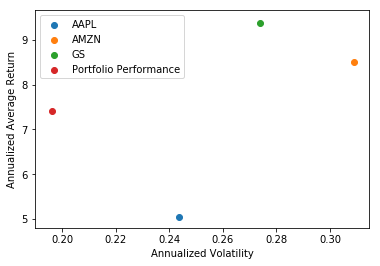

When SP500 is negative, the annual mean for AAPL is  -0.7757685343136509
When SP500 is negative, the annual stdev for AAPL is  0.24836768936441816
When SP500 is negative, the annual mean for AMZN is  -0.8415744791891044
When SP500 is negative, the annual stdev for AMZN is  0.3312920876791212
When SP500 is negative, the annual mean for GS is  -0.9209439889603306
When SP500 is negative, the annual stdev for GS is  0.27786758254386973
When SP500 is negative, the annual mean for Portfolio Performance is  -0.8588608899879917
When SP500 is negative, the annual stdev for Portfolio Performance is  0.2045999974417533


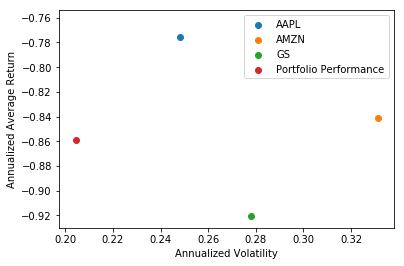

In [92]:
print('----Question 1.7& 1.8----')

def conditional_return(ticker, mask):
    return daily_pct_change[mask][ticker]

for i in ['AAPL','AMZN', 'GS', 'Portfolio Performance']:
    positive_annual_mean = (1 + np.mean(conditional_return(i, mask_positive)))**252 - 1
    positive_annual_stdev = np.std(conditional_return(i, mask_positive), ddof = 1)*np.sqrt(252)
    
    print(f'When SP500 is positive, the annual mean for {i} is ', positive_annual_mean)
    print('When SP500 is positive, the annual stdev for %s is '%i, positive_annual_stdev)
    
    plt.scatter(positive_annual_stdev, positive_annual_mean, label = i)
    
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Average Return')
plt.legend()
plt.show()

for i in ['AAPL','AMZN', 'GS', 'Portfolio Performance']:
    negative_annual_mean = (1 + np.mean(conditional_return(i, mask_negative)))**252 - 1 
    negative_annual_stdev = (np.std(conditional_return(i, mask_negative), ddof = 1)) * np.sqrt(252)
    
    print('When SP500 is negative, the annual mean for %s is '%i, negative_annual_mean)
    print('When SP500 is negative, the annual stdev for %s is '%i, negative_annual_stdev)
    

    plt_negative = plt.scatter(negative_annual_stdev, negative_annual_mean, label = i)

plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Average Return')
plt.legend()
plt.show()

